# **Alzheimer's Disease Detection**

**Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Import Statements**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline

split-folders is a python package to split a dataset into training, validation, and test sets

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Alzheimer', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6400 files [03:32, 30.15 files/s]


tf.keras.preprocessing.image_dataset_from_directory function to create TensorFlow tf.data.Dataset objects from the image datasets that were previously split and saved in the "output" directory.

In [ ]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
                                                               )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

This code snippet is using Matplotlib to visualize a grid of images from the training dataset. It generates a 3x3 grid displaying the first 9 images from the training dataset, along with their corresponding class labels.

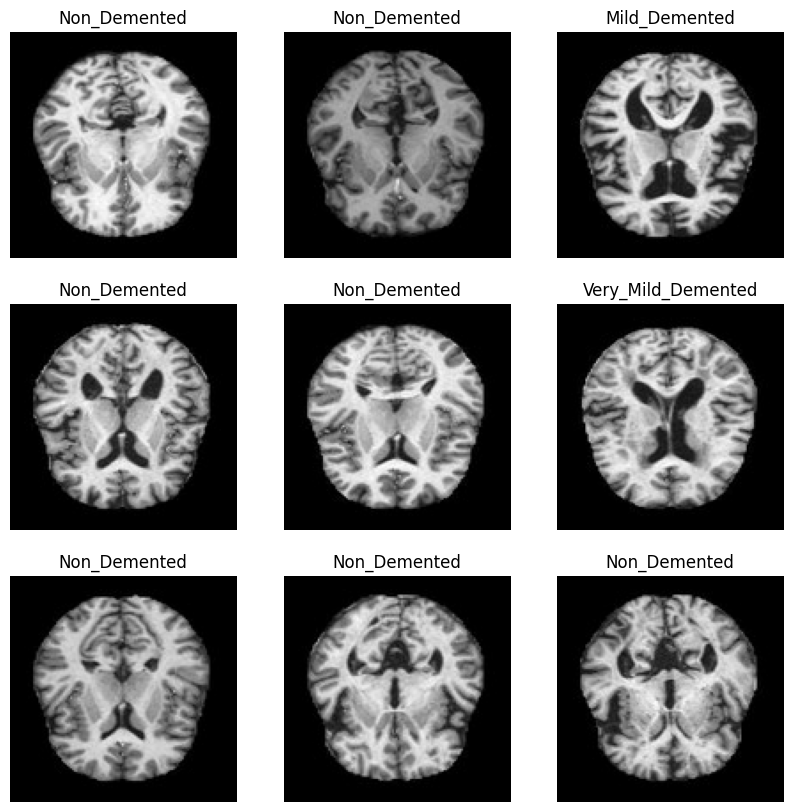

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

This bar plot shows the distribution or counts of different classes within the dataset.

## **CNN (Convolutional Neural Network)**

**Loading the model**

In [ ]:
from tensorflow.keras import layers, models, initializers

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    layers.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),

    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.MaxPooling2D((3, 3)),

    layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,428 (3.25 MB)

 Trainable params: 851,428 (3.25 MB)

 Non-trainable params: 0 (0.00 B)

**Training the model**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cnn = ModelCheckpoint(
    'best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Your original training with callback added
hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=[checkpoint_cnn]
)

# Load the best weights after training
model.load_weights('best_cnn_model.h5')


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4598 - loss: 1.2957
Epoch 1: val_accuracy improved from -inf to 0.53521, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.4602 - loss: 1.2932 - val_accuracy: 0.5352 - val_loss: 0.9683
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5277 - loss: 0.9663
Epoch 2: val_accuracy improved from 0.53521 to 0.59937, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5278 - loss: 0.9662 - val_accuracy: 0.5994 - val_loss: 0.8801
Epoch 3/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5784 - loss: 0.8963
Epoch 3: val_accuracy improved from 0.59937 to 0.63224, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5786 - loss: 0.8961 - val_accuracy: 0.6322 - val_loss: 0.8692
Epoch 4/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6190 - loss: 0.8390
Epoch 4: val_accuracy did not improve from 0.63224
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6191 - loss: 0.8387 - val_accuracy: 0.5649 - val_loss: 0.8485
Epoch 5/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6367 - loss: 0.8043
Epoch 5: val_accuracy improved from 0.63224 to 0.69640, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6368 - loss: 0.8040 - val_accuracy: 0.6964 - val_loss: 0.7305
Epoch 6/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6847 - loss: 0.7118
Epoch 6: val_accuracy improved from 0.69640 to 0.71831, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6847 - loss: 0.7114 - val_accuracy: 0.7183 - val_loss: 0.6580
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7229 - loss: 0.6431
Epoch 7: val_accuracy improved from 0.71831 to 0.73709, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7228 - loss: 0.6430 - val_accuracy: 0.7371 - val_loss: 0.5842
Epoch 8/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7370 - loss: 0.5870
Epoch 8: val_accuracy did not improve from 0.73709
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7373 - loss: 0.5866 - val_accuracy: 0.7324 - val_loss: 0.6054
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7856 - loss: 0.4948
Epoch 9: val_accuracy improved from 0.73709 to 0.78560, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7856 - loss: 0.4948 - val_accuracy: 0.7856 - val_loss: 0.4977
Epoch 10/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8228 - loss: 0.4445
Epoch 10: val_accuracy improved from 0.78560 to 0.84507, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8230 - loss: 0.4440 - val_accuracy: 0.8451 - val_loss: 0.3746
Epoch 11/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8270 - loss: 0.4231
Epoch 11: val_accuracy improved from 0.84507 to 0.87950, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8275 - loss: 0.4222 - val_accuracy: 0.8795 - val_loss: 0.3271
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8729 - loss: 0.3278
Epoch 12: val_accuracy did not improve from 0.87950
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8728 - loss: 0.3279 - val_accuracy: 0.8670 - val_loss: 0.3308
Epoch 13/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8817 - loss: 0.2963
Epoch 13: val_accuracy improved from 0.87950 to 0.93114, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8819 - loss: 0.2958 - val_accuracy: 0.9311 - val_loss: 0.2148
Epoch 14/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9008 - loss: 0.2599
Epoch 14: val_accuracy improved from 0.93114 to 0.94366, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9006 - loss: 0.2602 - val_accuracy: 0.9437 - val_loss: 0.1894
Epoch 15/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9142 - loss: 0.2234
Epoch 15: val_accuracy did not improve from 0.94366
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9141 - loss: 0.2237 - val_accuracy: 0.9437 - val_loss: 0.1589
Epoch 16/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9176 - loss: 0.2087
Epoch 16: val_accuracy did not improve from 0.94366
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9178 - loss: 0.2084 - val_accuracy: 0.9264 - val_loss: 0.2221
Epoch 17/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9293 - loss: 0.1951
Epoch 17: val_accuracy improved from 0.94366 to 0.96244, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9293 - loss: 0.1948 - val_accuracy: 0.9624 - val_loss: 0.1391
Epoch 18/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9433 - loss: 0.1526
Epoch 18: val_accuracy improved from 0.96244 to 0.96714, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9433 - loss: 0.1526 - val_accuracy: 0.9671 - val_loss: 0.1186
Epoch 19/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9488 - loss: 0.1413
Epoch 19: val_accuracy did not improve from 0.96714
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9486 - loss: 0.1416 - val_accuracy: 0.9546 - val_loss: 0.1281
Epoch 20/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9461 - loss: 0.1404
Epoch 20: val_accuracy improved from 0.96714 to 0.97496, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9463 - loss: 0.1401 - val_accuracy: 0.9750 - val_loss: 0.0849
Epoch 21/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9555 - loss: 0.1177
Epoch 21: val_accuracy did not improve from 0.97496
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9554 - loss: 0.1178 - val_accuracy: 0.9734 - val_loss: 0.0873
Epoch 22/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9512 - loss: 0.1214
Epoch 22: val_accuracy improved from 0.97496 to 0.98905, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9513 - loss: 0.1213 - val_accuracy: 0.9890 - val_loss: 0.0645
Epoch 23/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9594 - loss: 0.1124
Epoch 23: val_accuracy did not improve from 0.98905
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9594 - loss: 0.1125 - val_accuracy: 0.9844 - val_loss: 0.0641
Epoch 24/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9710 - loss: 0.0884
Epoch 24: val_accuracy did not improve from 0.98905
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9710 - loss: 0.0883 - val_accuracy: 0.9703 - val_loss: 0.0808
Epoch 25/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9675 - loss: 0.0872
Epoch 25: val_accuracy did not improve from 0.98905
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9675 - loss: 0.0874 - val_accuracy: 0.9875 - val_loss: 0.0443
Epoch 26/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9708 - loss: 0.0840
Epoch 26: val_accuracy did not impro

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9684 - loss: 0.0826 - val_accuracy: 0.9906 - val_loss: 0.0434
Epoch 28/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9719 - loss: 0.0752
Epoch 28: val_accuracy improved from 0.99061 to 0.99218, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9719 - loss: 0.0751 - val_accuracy: 0.9922 - val_loss: 0.0343
Epoch 29/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9752 - loss: 0.0692
Epoch 29: val_accuracy did not improve from 0.99218
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9752 - loss: 0.0692 - val_accuracy: 0.9875 - val_loss: 0.0447
Epoch 30/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9750 - loss: 0.0706
Epoch 30: val_accuracy did not improve from 0.99218
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9750 - loss: 0.0704 - val_accuracy: 0.9781 - val_loss: 0.0677
Epoch 31/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9768 - loss: 0.0680
Epoch 31: val_accuracy did not improve from 0.99218
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9768 - loss: 0.0679 - val_accuracy: 0.9906 - val_loss: 0.0380
Epoch 32/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9766 - loss: 0.0603
Epoch 32: val_accuracy did not impro

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9850 - loss: 0.0459 - val_accuracy: 0.9937 - val_loss: 0.0301
Epoch 35/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9812 - loss: 0.0527
Epoch 35: val_accuracy did not improve from 0.99374
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9812 - loss: 0.0527 - val_accuracy: 0.9875 - val_loss: 0.0284
Epoch 36/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9800 - loss: 0.0534
Epoch 36: val_accuracy did not improve from 0.99374
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9800 - loss: 0.0534 - val_accuracy: 0.9922 - val_loss: 0.0286
Epoch 37/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9785 - loss: 0.0644
Epoch 37: val_accuracy did not improve from 0.99374
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9785 - loss: 0.0644 - val_accuracy: 0.9906 - val_loss: 0.0259
Epoch 38/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9842 - loss: 0.0423
Epoch 38: val_accuracy did not impro

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9832 - loss: 0.0415 - val_accuracy: 0.9953 - val_loss: 0.0183
Epoch 42/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9935 - loss: 0.0224
Epoch 42: val_accuracy improved from 0.99531 to 0.99687, saving model to best_cnn_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9935 - loss: 0.0225 - val_accuracy: 0.9969 - val_loss: 0.0185
Epoch 43/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9858 - loss: 0.0331
Epoch 43: val_accuracy did not improve from 0.99687
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9858 - loss: 0.0333 - val_accuracy: 0.9906 - val_loss: 0.0272
Epoch 44/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9811 - loss: 0.0518
Epoch 44: val_accuracy did not improve from 0.99687
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9812 - loss: 0.0516 - val_accuracy: 0.9953 - val_loss: 0.0159
Epoch 45/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9873 - loss: 0.0351
Epoch 45: val_accuracy did not improve from 0.99687
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9873 - loss: 0.0352 - val_accuracy: 0.9953 - val_loss: 0.0191
Epoch 46/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9850 - loss: 0.0380
Epoch 46: val_accuracy did not impro

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9891 - loss: 0.0304 - val_accuracy: 0.9984 - val_loss: 0.0169
Epoch 49/50
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9920 - loss: 0.0203
Epoch 49: val_accuracy did not improve from 0.99844
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9920 - loss: 0.0202 - val_accuracy: 0.9984 - val_loss: 0.0090
Epoch 50/50
78/80 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9921 - loss: 0.0203
Epoch 50: val_accuracy did not improve from 0.99844
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9921 - loss: 0.0205 - val_accuracy: 0.9984 - val_loss: 0.0145


**Testing Analysis**

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

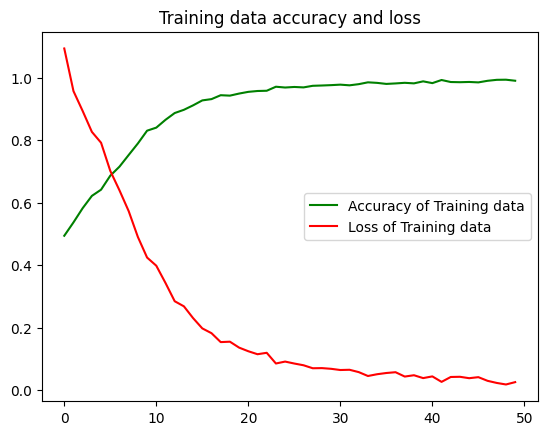

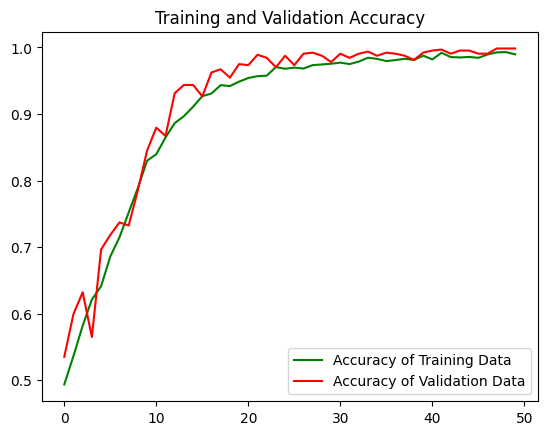

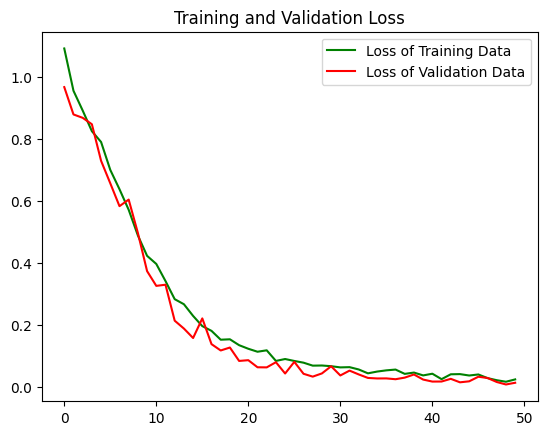

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))

# Plotting Accuracy and Loss of Training data
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.savefig('training_accuracy_loss.png')  # Save the figure
plt.figure()

# Plotting Training and Validation Accuracy
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.savefig('training_validation_accuracy.png')  # Save the figure
plt.figure()

# Plotting Training and Validation Loss
plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.savefig('training_validation_loss.png')  # Save the figure
plt.figure()

# Display the plots
plt.show()


In [ ]:
cnn_loss, cnn_accuracy = model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9933 - loss: 0.0282


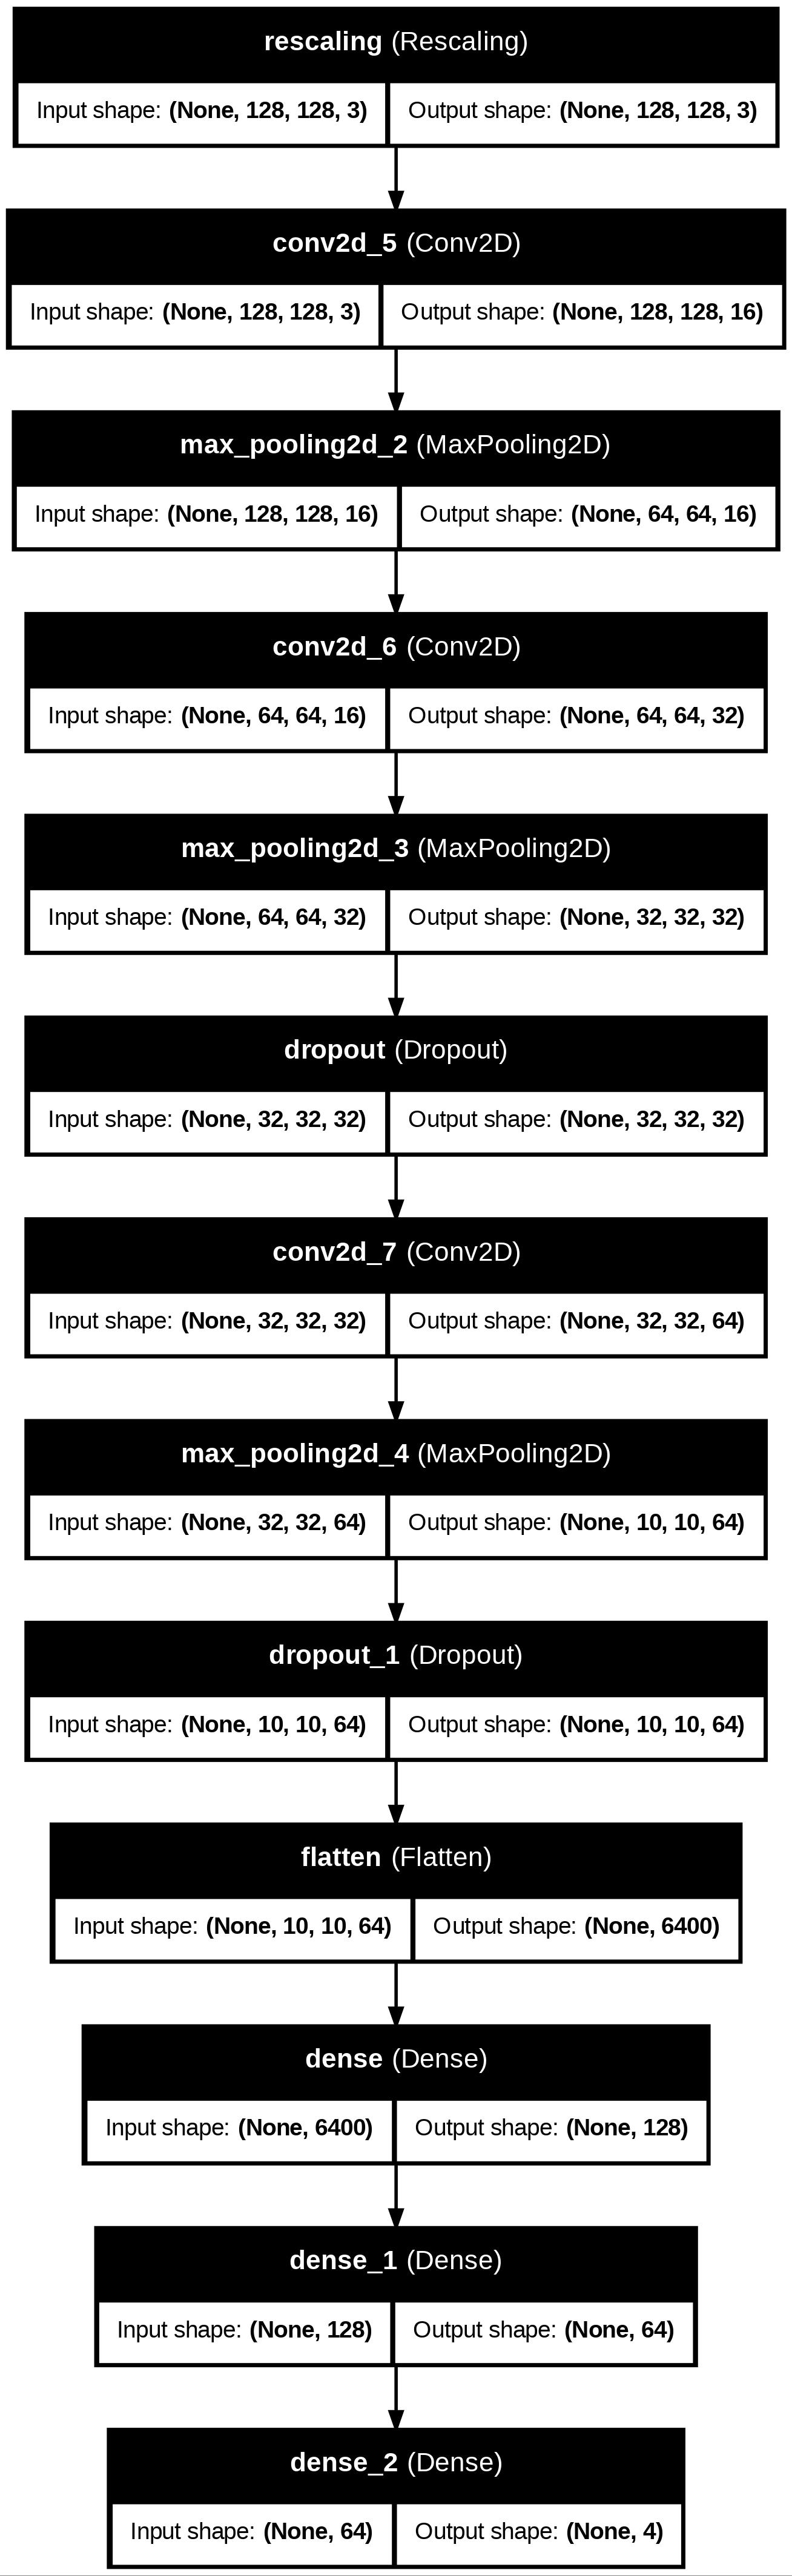

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model_cnn_architecture.jpg',show_shapes=True,show_layer_names=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


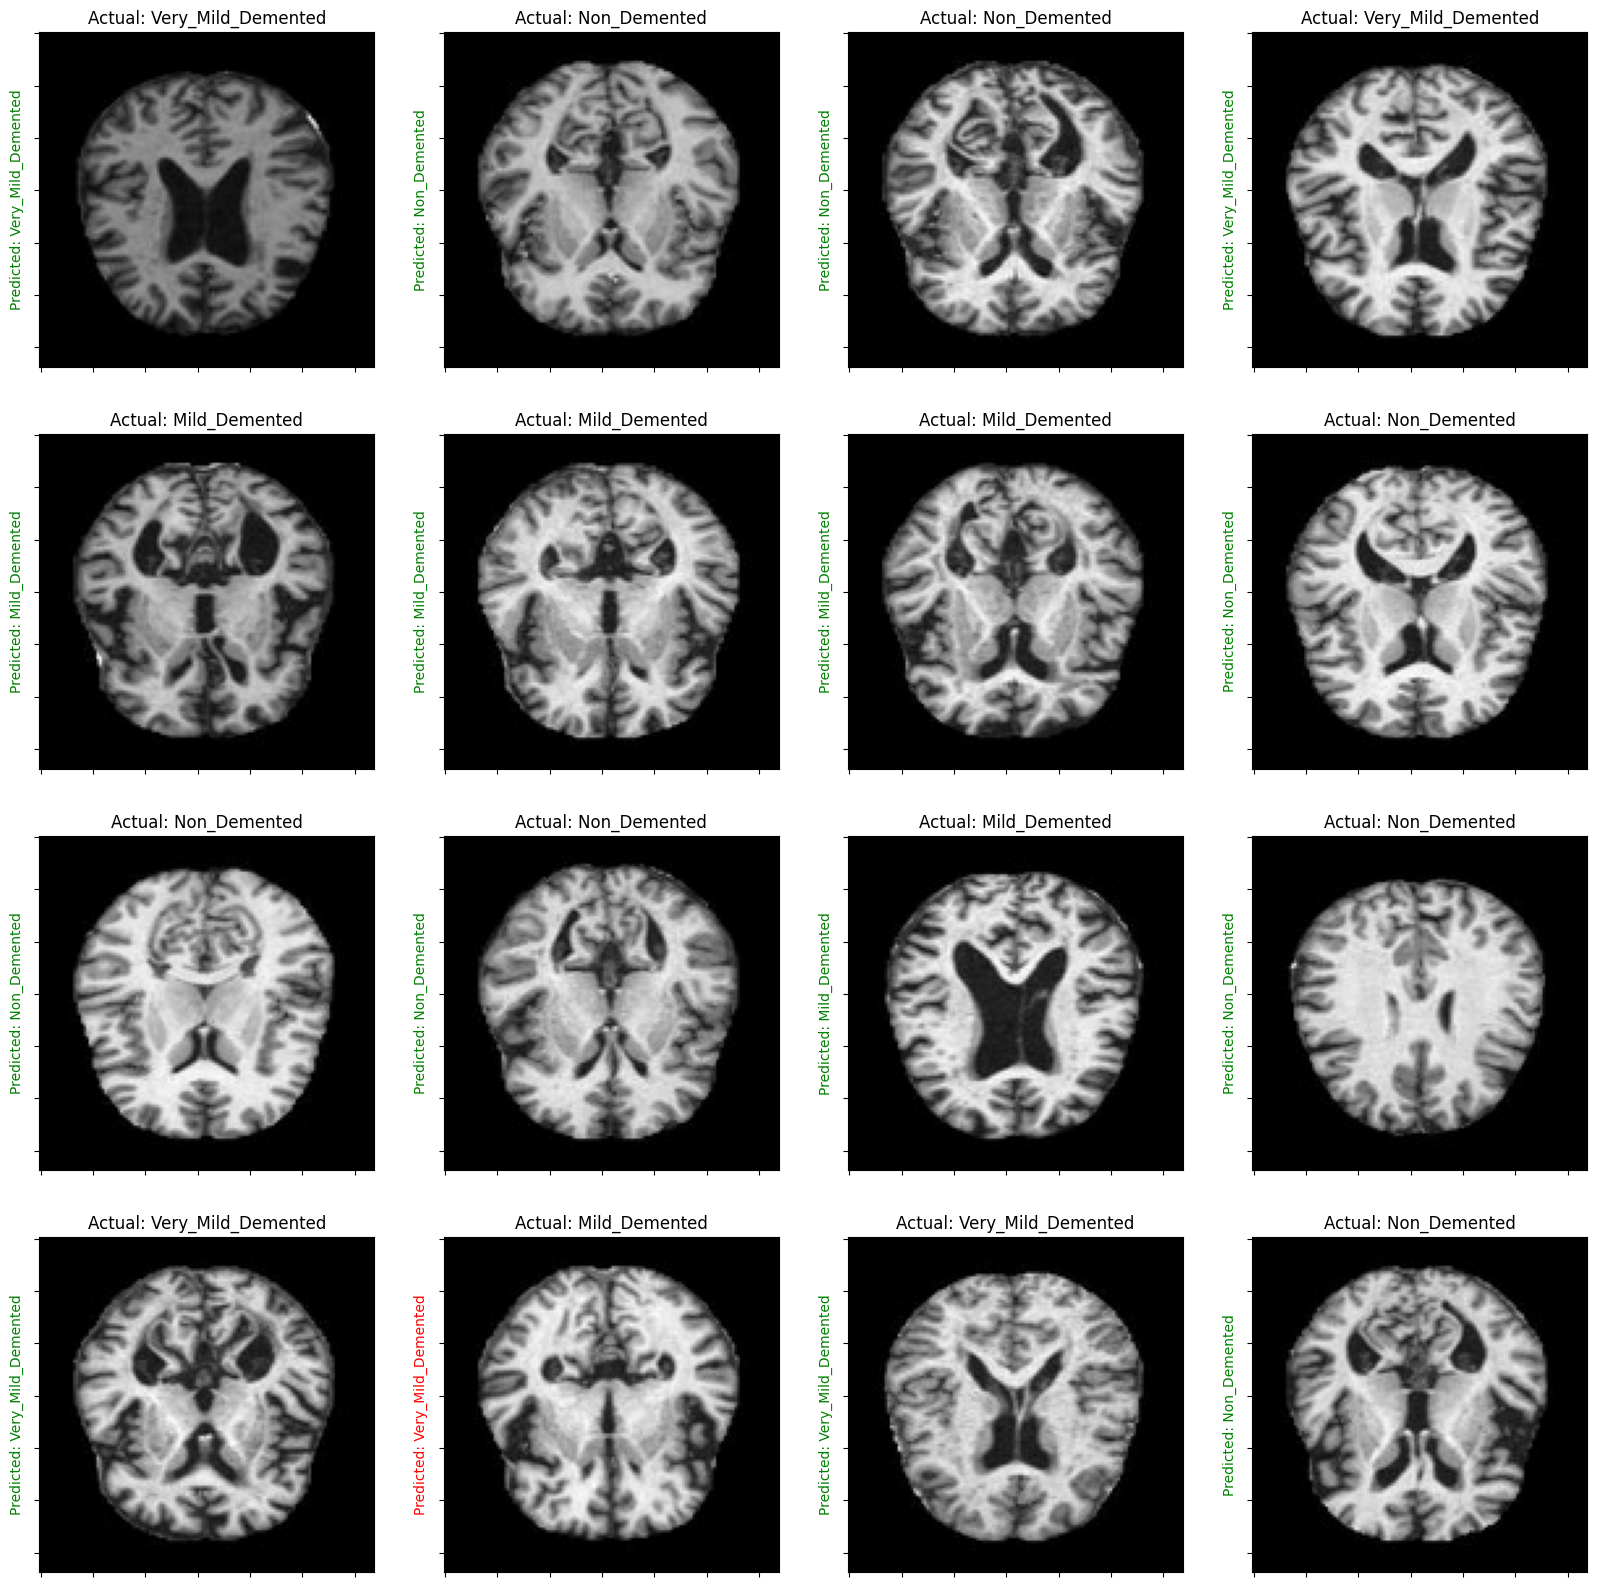

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
true_labels = []
pred_labels = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    preds = np.argmax(preds, axis=1)

    true_labels.extend(labels.numpy())
    pred_labels.extend(preds)

true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)


CNN Classification Report:

                    precision    recall  f1-score   support

     Mild_Demented       0.97      0.99      0.98        91
 Moderate_Demented       1.00      1.00      1.00         7
      Non_Demented       1.00      0.99      1.00       320
Very_Mild_Demented       1.00      0.99      0.99       224

          accuracy                           0.99       642
         macro avg       0.99      0.99      0.99       642
      weighted avg       0.99      0.99      0.99       642

CNN Accuracy: 99.22


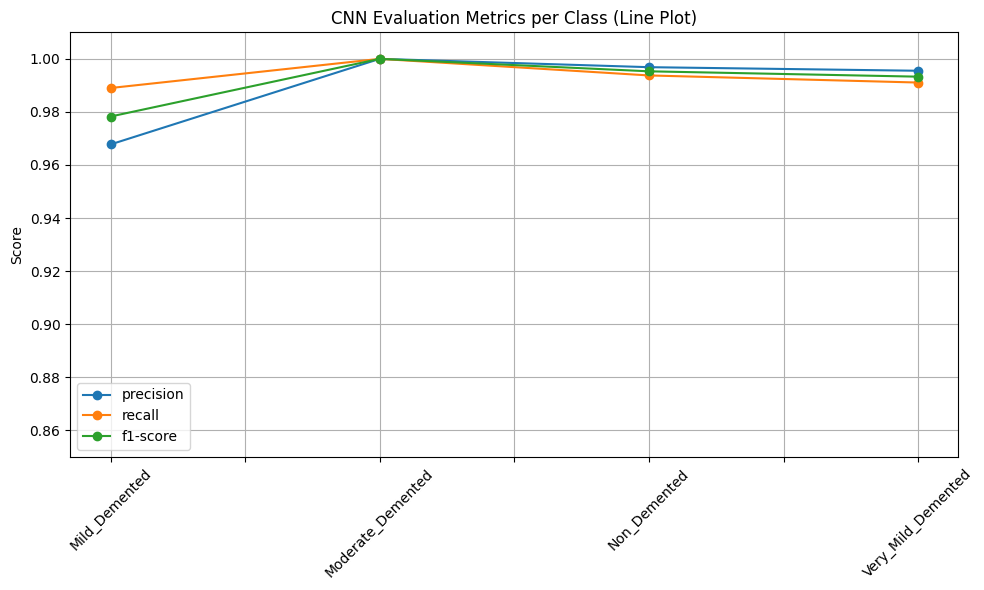

In [ ]:
# 1. Generate CNN classification report as a dictionary
cnn_report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)

# 2. Print report and accuracy
print("CNN Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))
cnn_accuracy = round(accuracy_score(true_labels, pred_labels), 4) * 100
print("CNN Accuracy:", cnn_accuracy)

# 3. Convert report to DataFrame for plotting
df_cnn = pd.DataFrame.from_dict(cnn_report).T
df_cnn = df_cnn.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# 4. Plot line chart for CNN metrics
df_cnn[['precision', 'recall', 'f1-score']].plot(marker='o', figsize=(10, 6))
plt.title('CNN Evaluation Metrics per Class (Line Plot)')
plt.ylabel('Score')
plt.ylim(0.85, 1.01)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("cnn_eval_line_plot.png", dpi=300)
plt.show()


## **ML Models**

In [ ]:
from tensorflow.keras import layers, models

# Define the Autoencoder
input_img = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder
train_images = np.concatenate([images.numpy() for images, _ in train_ds])
train_images = train_images.astype('float32') / 255.0

val_images = np.concatenate([images.numpy() for images, _ in val_ds])
val_images = val_images.astype('float32') / 255.0


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_ae = ModelCheckpoint(
    'best_autoencoder.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
ae_history = autoencoder.fit(
    train_images, train_images,
    epochs=30,
    batch_size=64,
    shuffle=True,
    validation_data=(val_images, val_images),
    callbacks=[checkpoint_ae]
)

# Load the best weights after training
autoencoder.load_weights('best_autoencoder.h5')


Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.4658
Epoch 1: val_loss improved from inf to 0.29972, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - loss: 0.4645 - val_loss: 0.2997
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2987
Epoch 2: val_loss improved from 0.29972 to 0.29425, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.2987 - val_loss: 0.2942
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2938
Epoch 3: val_loss improved from 0.29425 to 0.29143, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.2938 - val_loss: 0.2914
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2928
Epoch 4: val_loss improved from 0.29143 to 0.29014, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.2927 - val_loss: 0.2901
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2908
Epoch 5: val_loss improved from 0.29014 to 0.28960, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.2908 - val_loss: 0.2896
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2896
Epoch 6: val_loss improved from 0.28960 to 0.28865, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.2896 - val_loss: 0.2886
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2892
Epoch 7: val_loss improved from 0.28865 to 0.28847, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.2892 - val_loss: 0.2885
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2883
Epoch 8: val_loss improved from 0.28847 to 0.28786, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2883 - val_loss: 0.2879
Epoch 9/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2886
Epoch 9: val_loss improved from 0.28786 to 0.28760, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.2886 - val_loss: 0.2876
Epoch 10/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2884
Epoch 10: val_loss improved from 0.28760 to 0.28735, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.2884 - val_loss: 0.2874
Epoch 11/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2879
Epoch 11: val_loss improved from 0.28735 to 0.28731, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.2879 - val_loss: 0.2873
Epoch 12/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2875
Epoch 12: val_loss did not improve from 0.28731
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.2875 - val_loss: 0.2873
Epoch 13/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2877
Epoch 13: val_loss did not improve from 0.28731
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2877 - val_loss: 0.2876
Epoch 14/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2878
Epoch 14: val_loss improved from 0.28731 to 0.28670, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2878 - val_loss: 0.2867
Epoch 15/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2871
Epoch 15: val_loss did not improve from 0.28670
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.2871 - val_loss: 0.2869
Epoch 16/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2870
Epoch 16: val_loss improved from 0.28670 to 0.28655, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.2870 - val_loss: 0.2865
Epoch 17/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2870
Epoch 17: val_loss improved from 0.28655 to 0.28647, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.2870 - val_loss: 0.2865
Epoch 18/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2870
Epoch 18: val_loss improved from 0.28647 to 0.28628, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2870 - val_loss: 0.2863
Epoch 19/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2872
Epoch 19: val_loss improved from 0.28628 to 0.28627, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.2872 - val_loss: 0.2863
Epoch 20/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2862
Epoch 20: val_loss improved from 0.28627 to 0.28608, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2862 - val_loss: 0.2861
Epoch 21/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2866
Epoch 21: val_loss improved from 0.28608 to 0.28608, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.2866 - val_loss: 0.2861
Epoch 22/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2863
Epoch 22: val_loss improved from 0.28608 to 0.28596, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2863 - val_loss: 0.2860
Epoch 23/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2863
Epoch 23: val_loss did not improve from 0.28596
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2863 - val_loss: 0.2863
Epoch 24/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2859
Epoch 24: val_loss improved from 0.28596 to 0.28595, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.2859 - val_loss: 0.2860
Epoch 25/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2860
Epoch 25: val_loss did not improve from 0.28595
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2860 - val_loss: 0.2862
Epoch 26/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2864
Epoch 26: val_loss improved from 0.28595 to 0.28572, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.2864 - val_loss: 0.2857
Epoch 27/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2859
Epoch 27: val_loss improved from 0.28572 to 0.28560, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.2859 - val_loss: 0.2856
Epoch 28/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2862
Epoch 28: val_loss improved from 0.28560 to 0.28553, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.2862 - val_loss: 0.2855
Epoch 29/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2867
Epoch 29: val_loss improved from 0.28553 to 0.28552, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.2867 - val_loss: 0.2855
Epoch 30/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2858
Epoch 30: val_loss improved from 0.28552 to 0.28545, saving model to best_autoencoder.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.2858 - val_loss: 0.2855


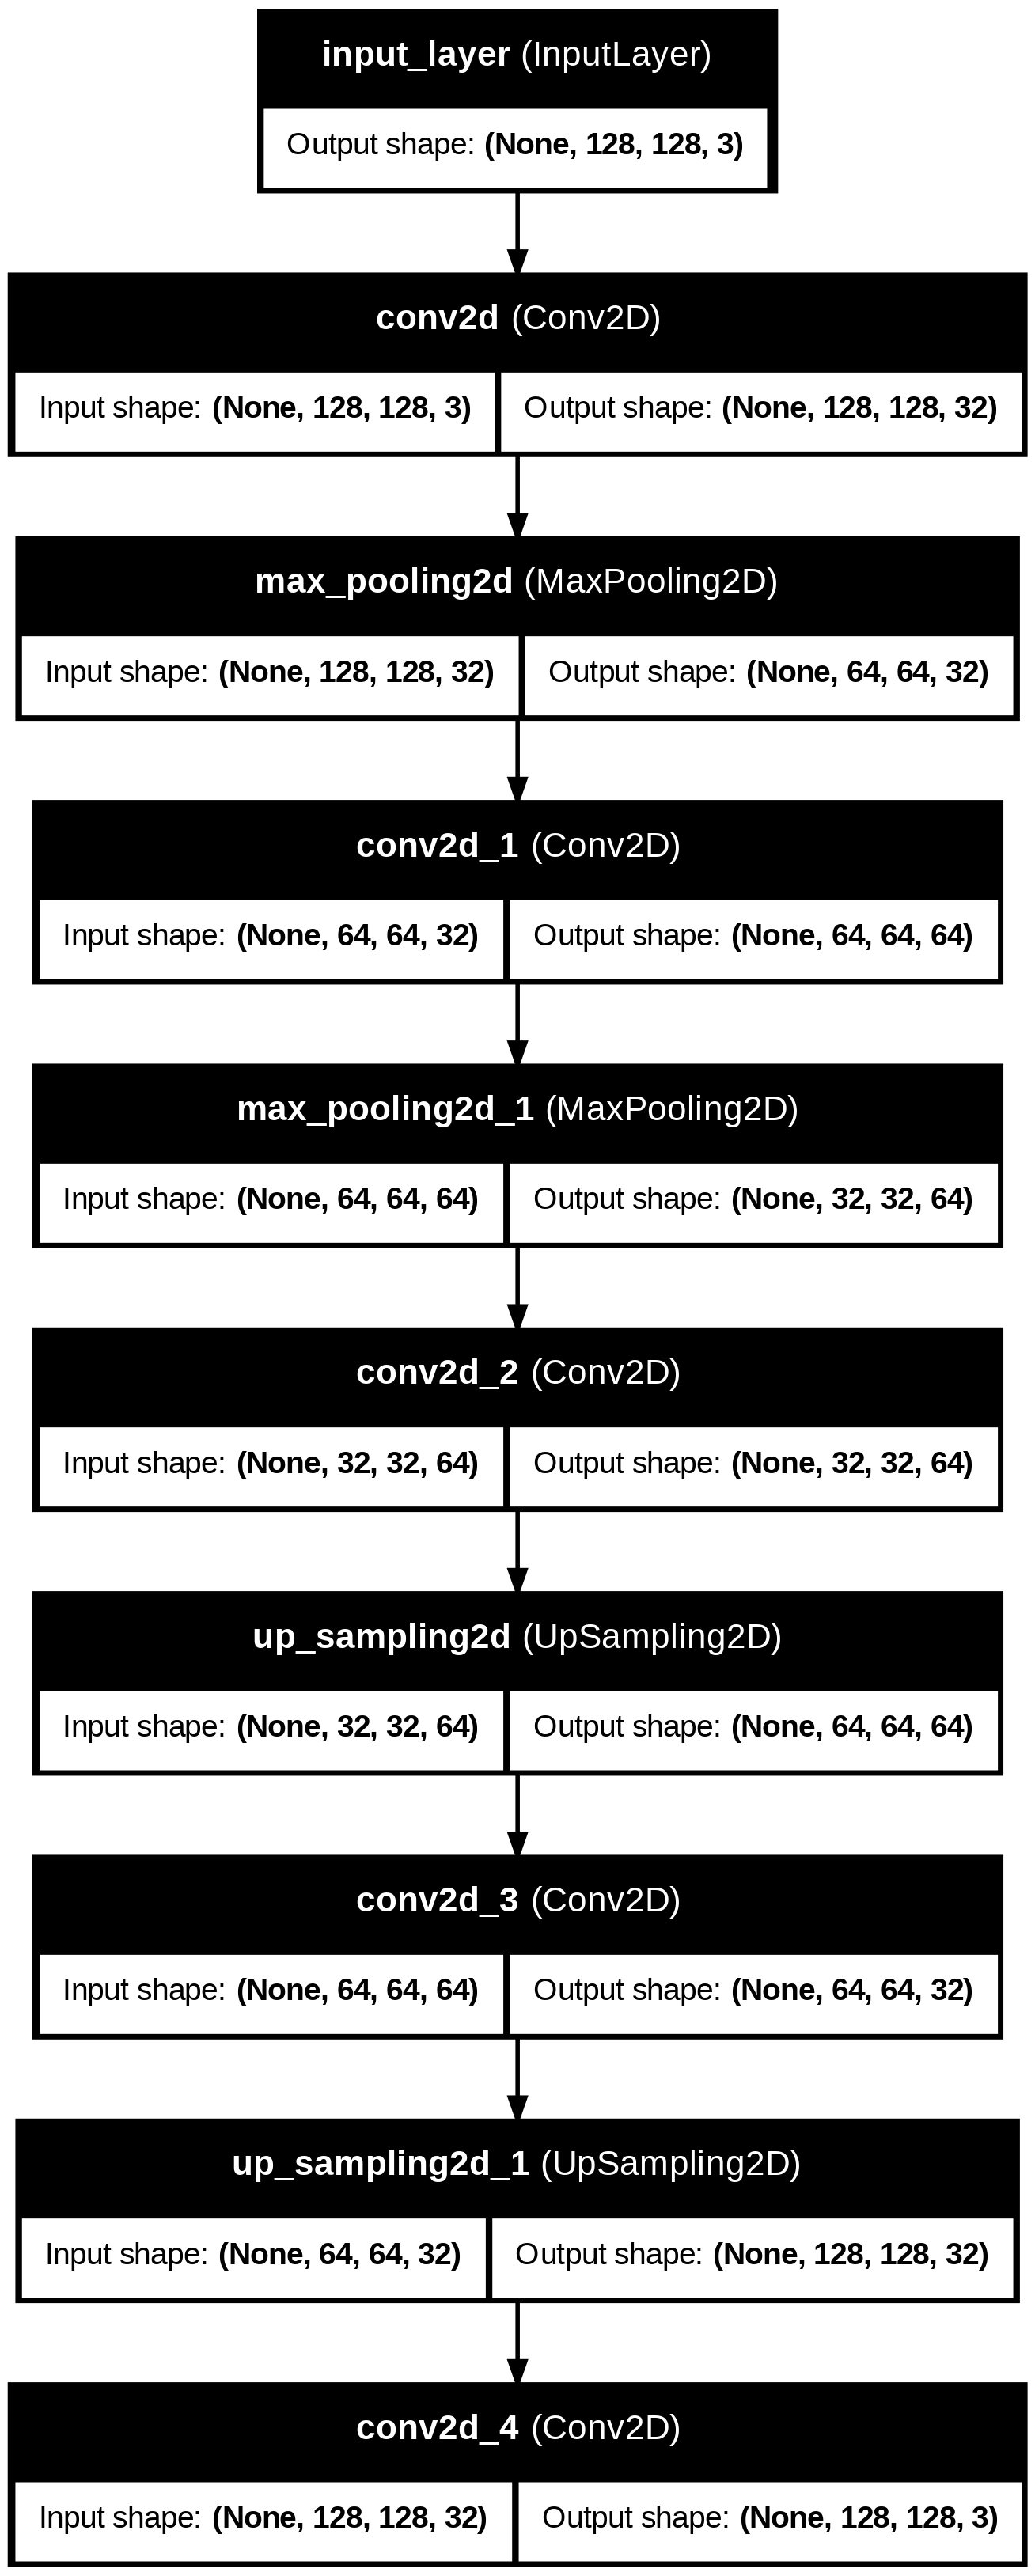

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the architecture of the Autoencoder model
plot_model(autoencoder, to_file='autoencoder_architecture.png', show_shapes=True, show_layer_names=True)


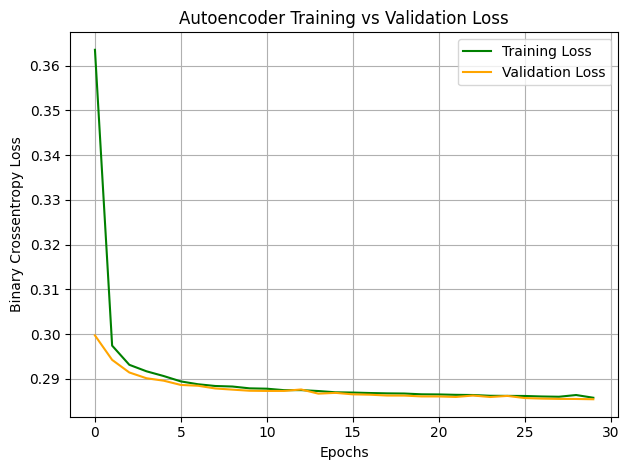

In [ ]:
plt.plot(ae_history.history['loss'], label='Training Loss', color='green')
plt.plot(ae_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Autoencoder Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Encoder Model
encoder = models.Model(input_img, encoded)

# Function to extract features
def extract_features_autoencoder(dataset, encoder):
    features = []
    labels = []
    for images, lbls in dataset:
        img_norm = images.numpy().astype("float32") / 255.0  # Normalize
        enc_features = encoder.predict(img_norm)
        enc_features = enc_features.reshape((enc_features.shape[0], -1))  # Flatten the features
        features.append(enc_features)
        labels.append(lbls.numpy())
    features = np.concatenate(features)
    labels = np.concatenate(labels)
    return features, labels

# Extract features from datasets
train_features, train_labels = extract_features_autoencoder(train_ds, encoder)
val_features, val_labels = extract_features_autoencoder(val_ds, encoder)
test_features, test_labels = extract_features_autoencoder(test_ds, encoder)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)



In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_clf = SVC(kernel='linear')
svm_clf.fit(train_features, train_labels)

SVC(kernel='linear')

SVM Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.98      0.97      0.97        91
 Moderate_Demented       0.78      1.00      0.88         7
      Non_Demented       0.98      0.98      0.98       320
Very_Mild_Demented       0.98      0.97      0.97       224

          accuracy                           0.98       642
         macro avg       0.93      0.98      0.95       642
      weighted avg       0.98      0.98      0.98       642

SVM Accuracy: 97.66


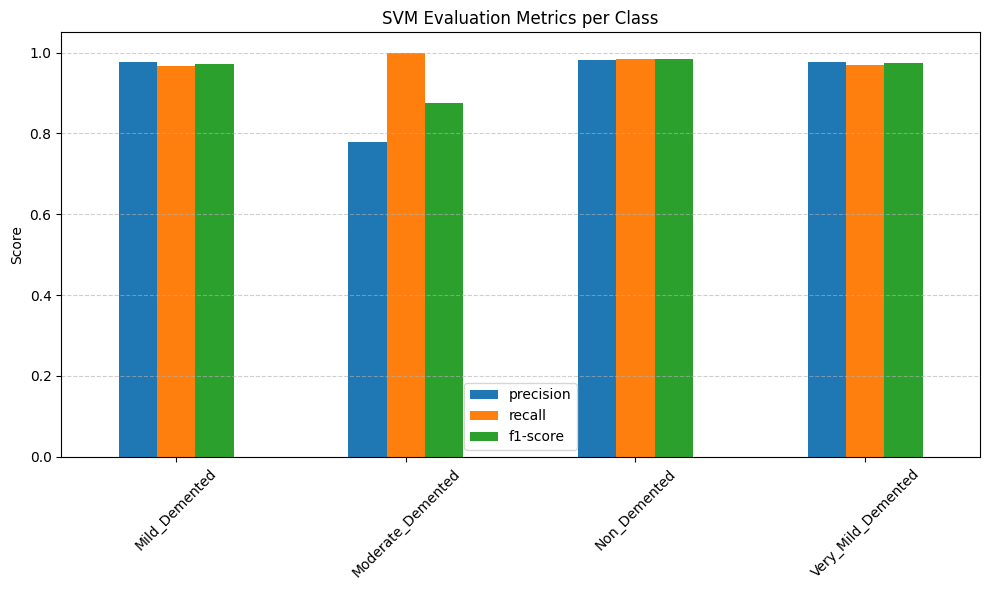

In [ ]:
# SVM Evaluation
svm_predictions = svm_clf.predict(test_features)
svm_report = classification_report(test_labels, svm_predictions, target_names=class_names, output_dict=True)
svm_accuracy = round(accuracy_score(test_labels, svm_predictions), 4) * 100

# Print Report and Accuracy
print("SVM Classification Report:")
print(classification_report(test_labels, svm_predictions, target_names=class_names))
print("SVM Accuracy:", svm_accuracy)

# Convert to DataFrame and plot
df = pd.DataFrame.from_dict(svm_report).T
df = df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('SVM Evaluation Metrics per Class')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg_clf = LogisticRegression(max_iter=1000)
log_reg_clf.fit(train_features, train_labels)

LogisticRegression(max_iter=1000)

Logistic Regression Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.87      0.97      0.92        91
 Moderate_Demented       0.78      1.00      0.88         7
      Non_Demented       0.95      0.95      0.95       320
Very_Mild_Demented       0.94      0.90      0.92       224

          accuracy                           0.93       642
         macro avg       0.89      0.95      0.91       642
      weighted avg       0.93      0.93      0.93       642

Logistic Regression Accuracy: 93.30000000000001


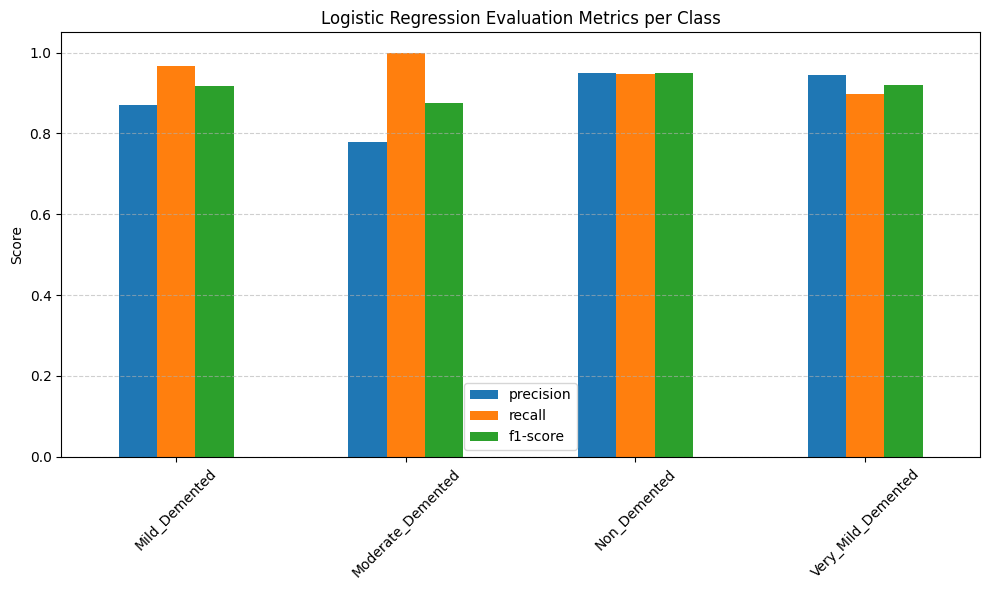

In [ ]:
# Logistic Regression Evaluation
log_reg_predictions = log_reg_clf.predict(test_features)
log_reg_report = classification_report(test_labels, log_reg_predictions, target_names=class_names, output_dict=True)
log_reg_accuracy = round(accuracy_score(test_labels, log_reg_predictions), 4) * 100

# Print report and accuracy
print("Logistic Regression Classification Report:")
print(classification_report(test_labels, log_reg_predictions, target_names=class_names))
print("Logistic Regression Accuracy:", log_reg_accuracy)

# Convert to DataFrame and plot
df_logreg = pd.DataFrame.from_dict(log_reg_report).T
df_logreg = df_logreg.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

df_logreg[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Logistic Regression Evaluation Metrics per Class')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
